In [64]:

class ASD() : 
  def __init__(self) :
    self.liststu=[]
  #학생정보 불러오기 및 저장하기, 학생 정보를 리턴시켜줌 데이터 정제 필요
  def stuinfo(self):
    import random

    self.files=input("열고 싶은 csv 파일의 이름을 적어주세요 : ")
    try :
      with open(self.files + '.csv', 'r', encoding='utf-8-sig') as self.f :
        self.liststu = self.f.readlines()
        return self.liststu
    #파일이 존재하지 않으면 오류 -> 파일 생성 알고리즘
    except : 
      self.p = input("입력한 csv파일의 이름이 존재하지 않습니다. 새 파일을 만드시겠습니까?(y or n)")
      if self.p == 'y' :
        with open(self.files + '.csv', 'w', encoding='utf-8-sig') as self.f :
          #학생 정보 입력 코드
          while True :
            try :
              self.x = int(input("학급 수 입력하기(양의 정수)"))
              self.y = int(input("모든 반 학생 수 입력하기(양의 정수)"))
              self.z = int(input("과목 수 입력하기(양의 정수)"))
              self.counter = 0;

              if self.x < 1 or self.y < 1 or self.z < 1 :
                print("잘못 입력하셨습니다.")
                continue
              else : 
                for self.i in range(self.x) :
                  for self.j in range(self.y) :
                    self.f.write('[')
                    for self.k in range(self.z) :
                      self.num = str(random.randint(0,100))
                      self.f.write(self.num)
                      self.f.write(',')
                    self.f.write(']')
                    self.f.write(',')
                  self.f.write('\n')
                self.f.close()
                with open(self.files + '.csv','r',encoding = 'utf-8-sig')as self.f :
                  self.liststu=self.f.readlines()
                  return self.liststu
                  self.f.close()
                  break
            except : 
              print("잘못 입력하셨습니다.aaaa")
              continue
      elif self.p == 'n' : 
        print("종료합니다")
        pass
      else :
        print("잘못 입력하셨습니다.")
        pass
#리스트 정제 함수
  def listfix(self,alist) :
    self.dlist = str(alist)
    self.ydatas = []
    self.cdatas = []
    self.sdatas = []
    self.counter = 3
    self.aftercounter = 3
    for self.i in range(len(self.dlist)):
      #여기가 종료
      if self.counter >= len(self.dlist) :
        return self.ydatas
        break

      elif self.dlist[self.counter:self.aftercounter-1] == 'n' :
        self.counter += 6
        self.aftercounter += 3

        if len(self.cdatas) == 0 :
          pass
        else : 
          self.ydatas.append(self.cdatas)
          self.cdatas = []
          #여기서 clear를 쓰면 함수가 의도와 다르게 실행되는데 이유를 모르겠다.

      elif self.dlist[self.aftercounter] == ']' :
        self.counter += 3
        self.aftercounter += 3
        if len(self.sdatas) == 0 :
          pass
        else :
          self.cdatas.append(self.sdatas)
          self.sdatas = []

      elif self.dlist[self.aftercounter] == ',' :
        self.k=int(self.dlist[self.counter:self.aftercounter])
        self.counter = self.aftercounter+1
        self.sdatas.append(self.k)
      self.aftercounter+=1
#학생별 통계
  
  def studata(self, _lf) : 
    import pandas as pd
    self.averall = []
    self.counter = 0 #총 학생 수를 저장하기 위한 카운터
    self.sumscore = 0
    for self.i in range(len(_lf)) :
      self.averpart = []
      for self.j in range(len(_lf[self.i])) :
        self.counter += 1
        self.stuscore = _lf[self.i][self.j]
        self.averpart.append(sum(self.stuscore)/len(self.stuscore))
      self.averall.append(self.averpart)
    print("학년 내 총 학생 수는", self.counter,"입니다.")
    while True : 
      try : 
        self.p=int(input("정보를 볼 학생의 반을 입력하세요. 옳지 않은 범위나 정수 이외의 키를 입력하면 종료합니다."))-1
        if self.p >= 0 :
          try : 
            self.q=int(input("정보를 볼 학생의 학생번호을 입력하세요. 옳지 않은 범위나 정수 이외의 키를 입력하면 종료합니다."))-1
            if self.q >= 0 :
              self.counterstu = 0
              self.counterf = 0
              self.classmem = _lf[self.p][self.q]
              print(self.classmem)
              print(self.p+1,"반",self.q+1,"번 학생의 점수는" )
              for self.t in range(len(self.classmem)) :
                print(self.t+1, "과목", self.classmem[self.t],"점")
              print("입니다.")
              print(self.p+1,"반",self.q+1,"번 학생의 평균은 ",self.averall[self.p][self.q])
              for self.a in range(len(self.averall)) :
                for self.b in range(len(self.averall[self.a])) : 
                  if self.averall[self.a][self.b] > self.averall[self.p][self.q] :
                    self.counterf += 1
              print(self.p+1,"반",self.q+1,"번 학생의 학년 석차는 ",self.counterf+1,"등 입니다.")
              print(self.p+1,"반",self.q+1,"번 학생의 등급은 ")
              if self.averall [self.p][self.q] >= 90 :
                print("A")
              elif self.averall [self.p][self.q] >= 80 :
                print("B")
              elif self.averall [self.p][self.q] >= 70 :
                print("C")
              elif self.averall [self.p][self.q] >= 60 :
                print("D")
              else :
                print("F") 
              print("입니다.")
              
              self.data1=pd.DataFrame(_lf[self.p][self.q])
              print(self.data1.plot(kind='bar'))

            else : 
              print("다시 입력하세요")
              continue
          except : 
            print("종료합니다")
            break
        else :
          print("다시 입력하세요")
          continue
      except : 
        print("종료합니다.")
        break
#반통계
  def classdata(self, _lf) :
    import pandas as pd
    self.averall = []#전체 학생의 평균값을 저장한 list
    self.classaver = [] #각 반의 평균을 저장하기 위한 list
    self.counter = 0 #총 학생 수를 저장하기 위한 카운터
    self.sumscore = 0
    for self.i in range(len(_lf)) :
      self.averpart = []
      for self.j in range(len(_lf[self.i])) :
        self.counter += 1
        self.stuscore = _lf[self.i][self.j]
        self.averpart.append(sum(self.stuscore)/len(self.stuscore))
      self.averall.append(self.averpart)
      self.classaver.extend(self.averpart)
    print("학년 내 총 학생 수는", self.counter,"입니다.")

    while True : 
      try :
        self.c = int(input("어느 반의 통계? 음수나 문자를 입력하면 종료합니다."))-1
        if self.c >= 0 :
          try :
            pass
          except :
            print("종료합니다")
            break
      except:
        print("종료합니다")
        break
      else :
        if self.c < 0 :
          print("종료합니다")
          break
        else :
          self.cdata = self.averall[self.c]

          print("반 평균은 ", sum(self.cdata)/len(self.cdata),"입니다.")
          print("반 표준 편차는 ", abs(sum(self.classaver)/len(self.classaver)-sum(self.cdata)/len(self.cdata)),"입니다.")
          self.classcounter = 1
          print("반 석차는")
          for self.m in range(len(self.averall)):
            if sum(self.averall[self.c])<sum(self.averall[self.m]) :
              self.classcounter += 1
            else :
              pass
          print(self.classcounter,"등입니다.")
          print("반 내의 학생들의 평균 분포")
          self.data1=pd.DataFrame(self.averall[self.c])
          print(self.data1.plot(kind='bar'))

#학년통계
  def yeardata(self, _lf) : 
    import pandas as pd
    self.averall = []#전체 학생의 평균값을 저장한 list
    self.classaver = [] #각 반의 평균을 저장하기 위한 list
    self.counter = 0 #총 학생 수를 저장하기 위한 카운터
    self.sumscore = 0
    for self.i in range(len(_lf)) :
      self.averpart = []
      for self.j in range(len(_lf[self.i])) :
        self.counter += 1
        self.stuscore = _lf[self.i][self.j]
        self.averpart.append(sum(self.stuscore)/len(self.stuscore))
      self.averall.append(self.averpart)
      self.classaver.extend(self.averpart)
    print("학년 내 총 학생 수는", self.counter,"입니다.")
    print("학년 내 전체 학생의 평균은",sum(self.classaver)/len(self.classaver),"입니다.")
    self.data1=pd.DataFrame(self.classaver)
    print(self.data1.plot(kind='bar'))
    while True :
      try :
        self.o = int(input("알고싶은 과목의 번호를 입력하세요. 음수나 문자를 입력하면 종료합니다."))-1
        if self.o >= 0 :
          try :
            pass
          except :
            print("종료합니다")
            break
      except :
        print("종료합니다")
        break
      else :
        self.subyear = []
        for self.x in range(len(_lf)) :
          self.subclass = []
          for self.y in range(len(_lf[self.x])) :
            self.k = _lf[self.x][self.y]
            self.subclass.append(self.k[self.o])
          self.subyear.append(self.subclass)
        
        self.subyearaver=[]
        self.subyearq=0
        for self.x in range(len(self.subyear)) :
          self.subclassaver = 0
          print(self.subyear[self.x])
          self.t = sum(self.subyear[self.x])/len(self.subyear[self.x])
          self.subclassaver=self.t
        print("모든학년의",self.o+1,"과목의 평균은",self.subclassaver)
        print(self.subclassaver)
        print(self.subyear)
        self.subgrade=[]
        for self.x in range(len(self.subyear)) :
          self.subgradestu=[]
          for self.y in range(len(self.subyear[self.x])) :
            self.subyearq+=abs(self.subyear[self.x][self.y]-self.subclassaver)
            if self.subyear[self.x][self.y] >=90 :
              self.subgradestu.append('A')
            elif self.subyear[self.x][self.y] >= 80 :
              self.subgradestu.append('B')
            elif self.subyear[self.x][self.y] >= 70 :
              self.subgradestu.append('C')
            elif self.subyear[self.x][self.y] >= 60 :
              self.subgradestu.append('D')
            else :
              self.subgradestu.append('F')
          self.subgrade.append(self.subgradestu)
        print("표준 편차는",self.subyearq/self.counter,"입니다.")
        print("학생들의 점수 등급은")
        print(self.subgrade)
        print("입니다.")
        self.suballscore = []
        for self.a in range(len(self.subyear)) :
          self.substuscore = []
          
          for self.b in range(len(self.subyear[self.a])) :
            self.substucounter = 1
            for self.c in range(len(self.subyear)) :
              for self.d in range(len(self.subyear[self.c])):
                if self.subyear[self.a][self.b] >self.subyear[self.c][self.d]:
                  self.substucounter += 1
            self.substuscore.append(self.substucounter)
          self.suballscore.append(self.substuscore)
        print("학생들의 석차는")
        print(self.suballscore)
        print("입니다.")
          

원하는 기능을 적어주세요 (a,s,c,y,q) :a
열고 싶은 csv 파일의 이름을 적어주세요 : asd
[[[94, 92, 73], [21, 81, 50], [33, 32, 32], [6, 44, 52]], [[40, 1, 33], [62, 25, 13], [68, 43, 1], [46, 44, 97]], [[73, 0, 46], [59, 1, 6], [27, 27, 10], [15, 0, 33]]]
원하는 기능을 적어주세요 (a,s,c,y,q) :c
학년 내 총 학생 수는 12 입니다.
어느 반의 통계? 음수나 문자를 입력하면 종료합니다.1
반 평균은  50.833333333333336 입니다.
반 표준 편차는  12.500000000000007 입니다.
반 석차는
[[86.33333333333333, 50.666666666666664, 32.333333333333336, 34.0], [24.666666666666668, 33.333333333333336, 37.333333333333336, 62.333333333333336], [39.666666666666664, 22.0, 21.333333333333332, 16.0]]
203.33333333333334
203.33333333333334
157.66666666666669
99.0
1 등입니다.
반 내의 학생들의 평균 분포
AxesSubplot(0.125,0.125;0.775x0.755)
어느 반의 통계? 음수나 문자를 입력하면 종료합니다.2
반 평균은  39.41666666666667 입니다.
반 표준 편차는  1.0833333333333428 입니다.
반 석차는
[[86.33333333333333, 50.666666666666664, 32.333333333333336, 34.0], [24.666666666666668, 33.333333333333336, 37.333333333333336, 62.333333333333336], [39.666666666666664, 22.0, 21.3333333333333

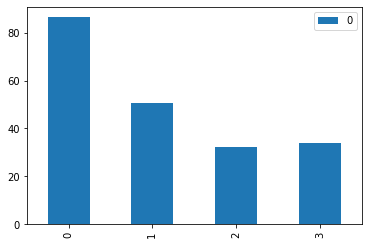

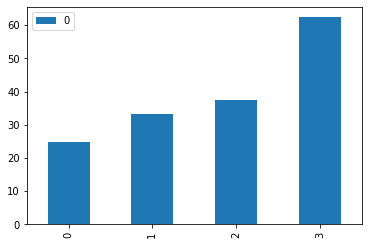

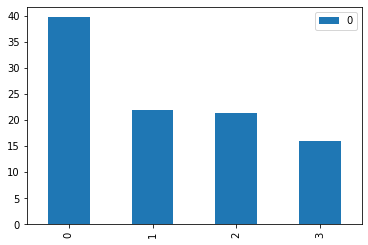

In [65]:
#최상위 데이터 관리 프로그램 알고리즘

while True:
  z = ASD() #z에 함수 ASD를 불러오기
  a=input("원하는 기능을 적어주세요 (a,s,c,y,q) :")
  #종료함수
  if a == 'q':
    print("프로그램을 종료합니다.")
    break
  #학생정보 불러오기 및 저장하기
  elif a=='a' : 
    las = z.stuinfo() #ASD의 stuinfo 함수 실행, 리턴값()
    try :
      lf = z.listfix(las) #lf가 list형태로 된 데이터를 가지고 있음, 앞으로의 모든 기능들은 lf로 활용
      print(lf)
    except :
      print("다시 실행합니다")
      continue
  #학생별통계
  elif a=='s' :
    z.studata(lf)
  #반통계
  elif a=='c' : 
    z.classdata(lf)
  #학년통계
  elif a=='y' :
    z.yeardata(lf)
  else : 
    print("잘못 입력하셨습니다.")
    continue